# Data Mining: An Empirical Analysis of the Influence of Elon Musk's Tweets on the Tesla Stock Price

# Introduction

Stock market prediction has been an active area of research for a long time. Now-a-days social media can be seen as a representation of the public sentiment and opinion about current events. Especially Twitter has attracted a lot of attention from researchers for studying public sentiments. (Nisar, 2018 1. Juni)

Since the beginnning of the covid crisis and the expansion of quantitative easying programs from the ecb and the federal reserve, we have seen a renaissance of crypto currencies, rise in penny stocks as well as tech values. (Yahoo Finance, 2021), (European Central Bank, 2021), (Economics Observatory, 2021)
Some experts argue whether at least to certain extent some of these price increases are being driven by influential individuals stating their opinion about a particular stock or asset in general on social media platforms. (Shead, 2021)

As a result of these speculations I choose to do a reasearch project in which I am going to analyse the potential influence of tweets from influential individuals (in short: influencer) on publicly traded financial asset prices. For this I choose the influencer based on two criteria: The first cirteria is their reach and engagement on Twitter and the second is the frequency on which this individual is talking about financial assets in general. 
Based on these criteria I choose Elon Musk because his Twitter presence with more than 50 Million followers and his frequent tweets about assets such as his own company Telsa as well as other stocks and cryptocurrencies combines the two criteria perfectly. 

Now the question arises which assets are being at the centre if this project. For this decision I looked at the assets that Mr. Musk was tweeting about and it became clear that there were in particular 3 assets that were standing out: 
- Tesla (Stock) 
- Bitcoin (Cryptocurency) - Bonus
- Dogecoin (Cryptocurency) - Bonus

I'm going to do an in-depth analysis of the Tesla stock and use the two cryptocurrencies as potential bonus material in this project. (Note: I excluded private companies since I have to obtain the pricing data in order to do the analysis. This is the reason why for instance SpaceX was not included in the list above) 
***
In statistical terms I would like to test the following hypothesis (H1): 
> __There is a significant linear correlation between the sentiment (describe quantitatively through the VADER score) of Elon Musks tweets about Tesla and the Tesla stock price__.

After the analysis is completed there are 3 different possible scenarios for the results: 
1. We have a _positive linear correlation_ between the stock price and the sentiment of the tweets. Indicated by a pearson correlation coefficient of r >= 0.4 
2. We have _negative linear correlation_ between the stock price and the sentiment of the tweets. Indicated by a pearson correlation coefficient of r <= -0.4
3. We have _no correlation_ between the stock price and the sentiment of the tweets. Indicated by a pearson correlation coefficient in the range of 0.4 > r > -0.4 

In finance there is usually a lot of money and potential downturn at stake this is why I choose a rather high threshold for the scenarios. I am fully aware of the fact that the price of publicly traded financial assets are determined by thousands of different factors (if not more) which generally indicates that there is a high chance for factors with low correlation which still have an impact. The 0.4 represents the result of the two poles. 
In order to discard the H0 hypothesis and accept the H1 we need to have at least a p.value of <0.05 for the 1 and 2 scenarios. For the 3 scenario there is no necessity for a significant (p.value<0.05) result since we only prove H1 if we can discard H0 but if we can't discard H0 because our scenario 1 and 2 are not significant we simply "stay" at the H0 hypothesis. 
***
From a technical and methodoligical perspective I will be using Natural Language Processing (NLP) and more specifically the subpart sentiment analysis as a tool to understand on an automated basis the sentiment of Mr.Musks tweets. The preferred programming language will be python. 

The general structure is composed of 5 different parts: 
#### 1. [Data Import & Inspection](#Section1)
In this part I am going to import the required datasets and inspect those correspondingly. On the one hand we have the Twitter (or tweets) dataset which includes all tweets from Mr. Musk starting at the 2010-06-04 and ending at the 2021-04-17 as well as numerous other potentially interesting features such as likes or retweets. (more on that matter later on) On the other hand I imported stock prices of Tesla as well as the prices of the two cryptocurrencies Dogecoin and Bitcoin from the Yahoo Finance API.  
#### 2. [NLP - Sentiment Analysis](#Section2) 
In this chapter I used the sentiment package (VADER) and applied the algorithm to the tweets from my datatset. 
#### 3. [Correlation Analysis & Visualization](#Section3) 
For this part I visualized my findings and fine tuned the dataset in order to get potentially more insights and detect more patterns. 
#### 4. [Bonus - Analysis of Dogecoin and Bitcoin](#Section4) 
The forth chapter is essentially a bonus chapter composed of a correlation analysis of the cryptocurrency prices for Dogecoin and Bitcoin and the sentiment of Mr.Musks tweets. 
#### 5. [Conlusion](#Section5) 
In the end I conclude my findings and comment on the analysis process. 

***
source1: Nisar, T. N. (2018, 1. Juni). Twitter as a tool for forecasting stock market movements: AÂ short-window event study. ScienceDirect. https://www.sciencedirect.com/science/article/pii/S2405918817300247

source2: Yahoo is now a part of Verizon Media. (o. D.). Yahoo Finance. Abgerufen am 11. Juli 2021, von https://finance.yahoo.com/quotes/API,Documentation/view/v1/

source3: European Central Bank. (2021, 19. Februar). Our response to coronavirus (COVID-19). https://www.ecb.europa.eu/home/search/coronavirus/html/index.en.html

source4: Economics Observatory. (2021, 8. Februar). How has the Fed responded to the Covid-19 recession? https://www.economicsobservatory.com/how-has-the-fed-responded-to-the-covid-19-recession

source5: Shead, S. (2021, 1. Februar). Elon Musk’s tweets are moving markets — and some investors are worried. CNBC. https://www.cnbc.com/2021/01/29/elon-musks-tweets-are-moving-markets.html

#### Workspace Preperation

In [2]:
# import packages 
import os
import tweepy as tw
import pandas as pd
import numpy as np
import re

import tweepy 
import csv

# vader approach
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import datetime as dt
import pytz
from pytz import timezone

import yfinance as yf
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from itertools import cycle, islice
from sklearn import preprocessing
import re
import scipy


# Data Import & Inspection <a id="Section1"></a>

## Data Import - Twitter API 
Initially I tried to use the Twitter API in order to generate the dataset by myself. Unfortunately Twitter sets a cap on the amount of requests that one user is allowed to do. (Twitter Developer Platform, (o. D.)) In addition to that Twitter also limits the option to request data for a longer time period than just a couple of weeks. After spending hours on how to bypass these restrictions I came to the conclusion that if I want to answer my hypothesis I have to get the data somewhere else. This was when I came across a dataset from kaggle which fitted the purpose perfectly. (Olteanu, 2021) Oltenau a user from kaggle scraped Twitter with twint which is a Twitter intelligence tool that allows essentially scraping with fewer limits. (twintproject,2021) By investigating on how Oltenau got the datset I was able to confirm the validity of the data. <br> <br> 

***

source6: Rate limits: Standard v1.1. (o. D.). Docs | Twitter Developer Platform. Abgerufen am 12. Juli 2021, von https://developer.twitter.com/en/docs/twitter-api/v1/rate-limits

source7: Olteanu, O. A. (2021, 17. April). All Elon Musk’s Tweets. Kaggle. https://www.kaggle.com/andradaolteanu/all-elon-musks-tweets

source8: twintproject/twint. (o. D.). GitHub. Abgerufen am 12. Juli 2021, von https://github.com/twintproject/twint

## Data Import - Kaggle 

In [3]:
#  === Tweets ===
tweets = pd.read_csv("/Users/pietj.ginski/Desktop/BWL-Studium/BWL 6 Semester/Transfermodul/Raw Data/TweetsElonMusk.csv")

tweets = tweets[["id", "created_at", "date", "time", "username", 
                 "tweet", "mentions", "replies_count", 
                 "retweets_count", "likes_count", "hashtags", "link","reply_to"]]

tweets.head()

,id,created_at,date,time,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,link,reply_to
0,1381273474400800773,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,elonmusk,@vincent13031925 For now. Costs are decreasing...,[],640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,"[{'screen_name': 'vincent13031925', 'name': 'V..."
1,1381273076709478403,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,elonmusk,Love this beautiful shot,[],2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,[]
2,1381258144916008964,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,elonmusk,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],115,48,1380,[],https://twitter.com/elonmusk/status/1381258144...,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb..."
3,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,elonmusk,The art In Cyberpunk is incredible,[],8437,10329,228144,[],https://twitter.com/elonmusk/status/1381221447...,[]
4,1381129584435818496,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,elonmusk,@itsALLrisky 🤣🤣,[],446,542,7489,[],https://twitter.com/elonmusk/status/1381129584...,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',..."


In [3]:
# modify the date column to the correct time zone (EST instead of EEST)
tweets.created_at = pd.to_datetime(tweets.created_at)

# apply new york timezone to the created_at column because our stock data comes from new york
tweets['created_at_EST'] = pd.to_datetime(tweets['created_at'].dt.tz_localize('est', ambiguous=False))

# extract date and time from created_at_EST
tweets['date_EST'] = pd.to_datetime(tweets['created_at_EST'].dt.date)

/Users/pietj.ginski/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname EEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/pietj.ginski/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname EET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


## Data Inspection

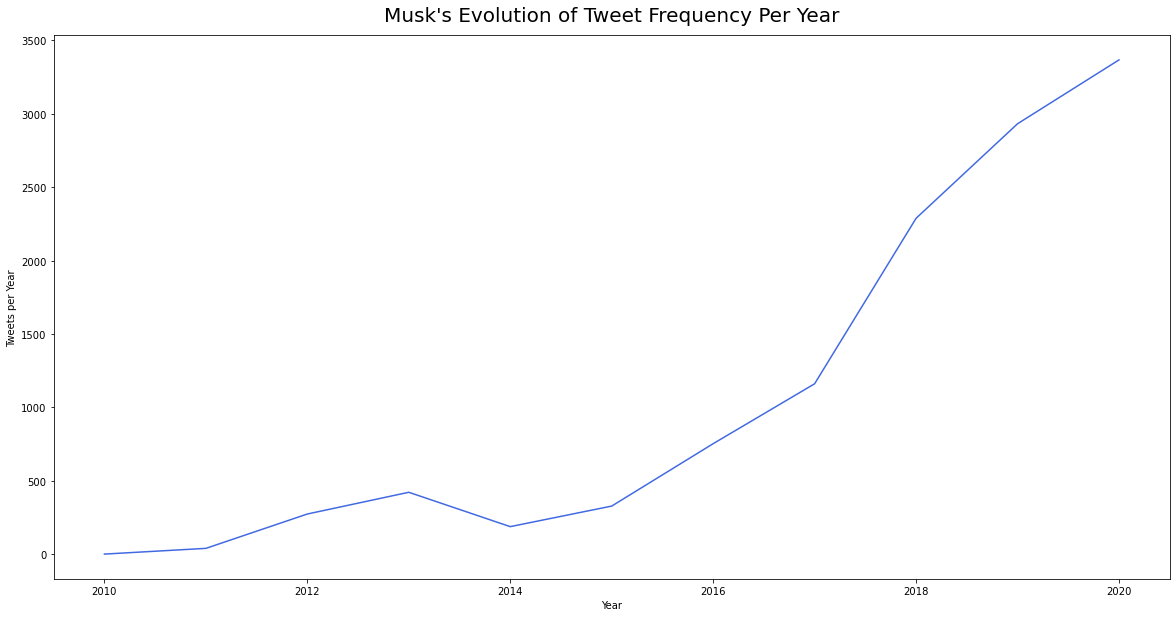

In [4]:
# group by year and plot counts to tweets (exluding the last year since it would be misleading)
plt.figure(figsize = (20, 10))
plt.plot(tweets['date_EST'].groupby(tweets.date_EST.dt.year).agg('count')[:-1],color = 'royalblue' )
plt.xlabel("Year")
plt.ylabel("Tweets per Year")
plt.title("Musk's Evolution of Tweet Frequency Per Year", fontsize=20, pad='14.0')
plt.show()

In [5]:
# create new features 
pop = ["likes_count", "retweets_count", "replies_count"]
pop_df = tweets.groupby(tweets.date_EST.dt.year).agg({pop[0] : 'sum',
                                                      pop[1] : 'sum',
                                                      pop[2] : 'sum',
                                                      'tweet' : 'count'}).reset_index()

# create average likes/replies/retweets column
pop_df["avg_likes"] = pop_df["likes_count"]/pop_df["tweet"]
pop_df["avg_retweets_count"] = pop_df["retweets_count"]/pop_df["tweet"]
pop_df["avg_replies_count"] = pop_df["replies_count"]/pop_df["tweet"]

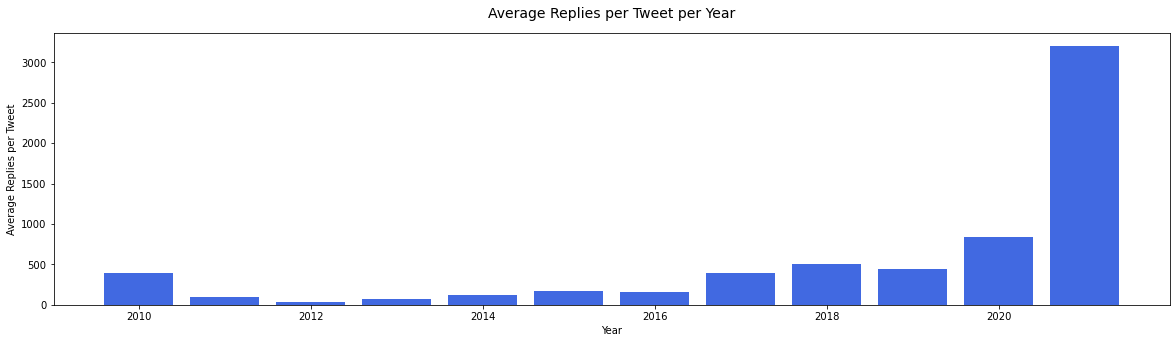

In [6]:
# plot average replies over time 
plt.figure(figsize = (20, 5))
plt.bar(pop_df["date_EST"], pop_df["avg_replies_count"], color = 'royalblue')
plt.xlabel("Year")
plt.ylabel("Average Replies per Tweet")
plt.title("Average Replies per Tweet per Year", fontsize=14, pad='15.0')
plt.show()

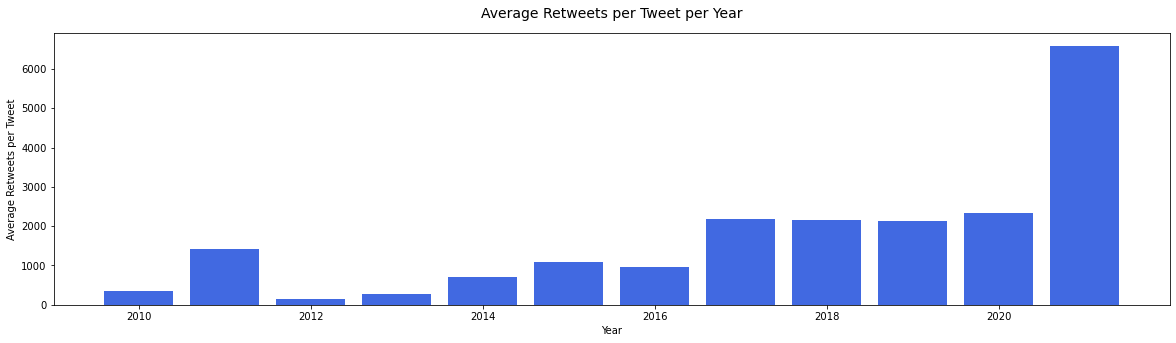

In [7]:
# plot average retweets over time 
plt.figure(figsize = (20, 5))
plt.bar(pop_df["date_EST"], pop_df["avg_retweets_count"], color = 'royalblue')
plt.xlabel("Year")
plt.ylabel("Average Retweets per Tweet")
plt.title("Average Retweets per Tweet per Year", fontsize=14, pad='15.0')
plt.show()

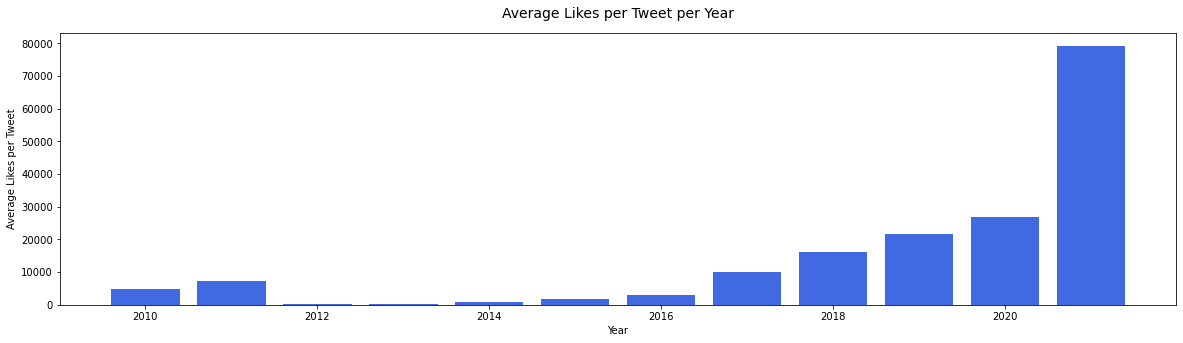

In [8]:
# plot average likes over time 
plt.figure(figsize = (20, 5))
plt.bar(pop_df["date_EST"], pop_df["avg_likes"], color = 'royalblue')
plt.xlabel("Year")
plt.ylabel("Average Likes per Tweet")
plt.title("Average Likes per Tweet per Year", fontsize=14, pad='15.0')
plt.show()

There are 1141124 words in the combination of all tweets.


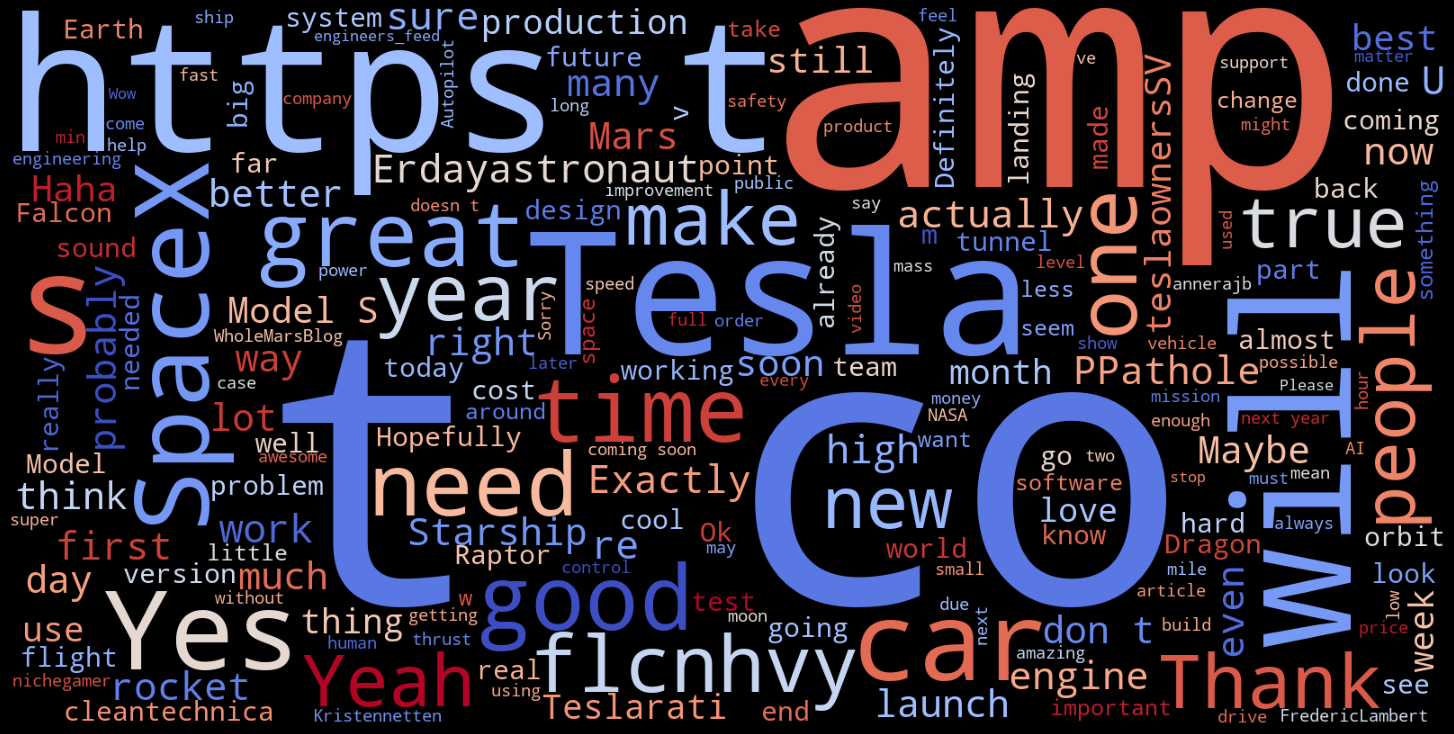

In [9]:
# create a worldcloud 
text = " ".join(word for word in tweets.tweet)
print ("There are {} words in the combination of all tweets.".format(len(text)))

# display the generated image
wordcloud = WordCloud(width=1600, height=800,
                      colormap = "coolwarm").generate(text)
plt.figure(figsize = (20, 10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Data Import - Yahoo Finace

In [10]:
## Tesla Stock Price

# define the ticker symbol
tickerSymbol = 'TSLA'

# get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# get the historical prices for this ticker
tesla_p = tickerData.history(period='1d', start='2010-06-04', end='2021-04-11')

# get daily returns
tesla_p["daily_returns"] = (tesla_p["Close"] / tesla_p["Close"].shift(1)) - 1

# check data
tesla_p.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns
Date,,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0,NaN
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0,-0.002512
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0,-0.078472
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0,-0.125683
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0,-0.160938


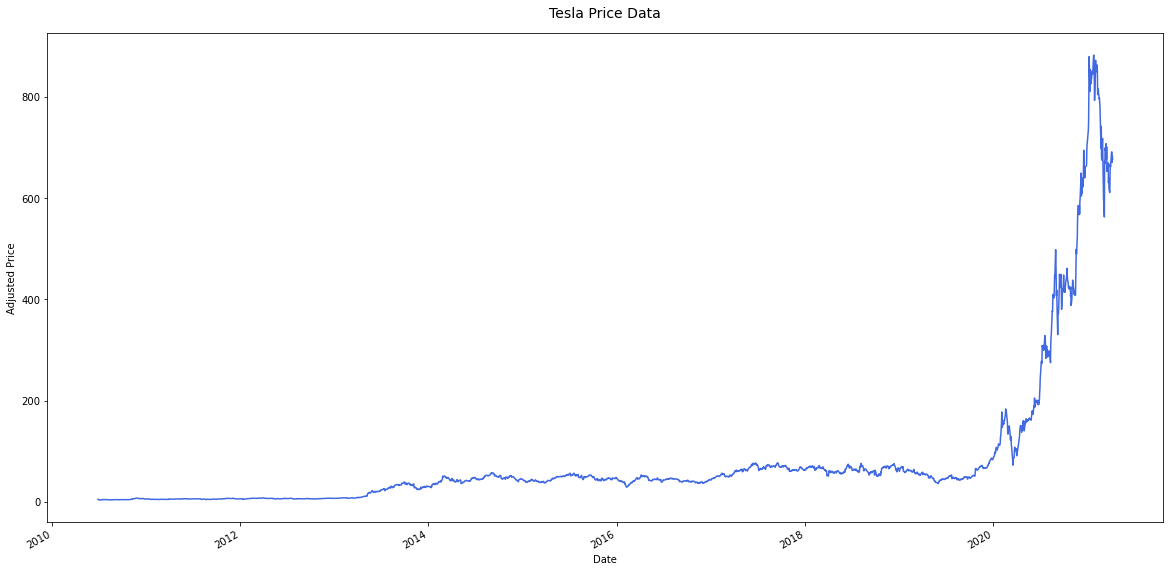

In [11]:
# plot the tesla adjusted price over time 
plt.figure(figsize = (20, 10))
tesla_p["Close"].plot(color = 'royalblue')
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.title("Tesla Price Data", fontsize=14, pad='15.0')
plt.show()

In [12]:
## Bitcoin Price 

# define the ticker symbol
tickerSymbol = 'BTC-USD'

# get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# get the historical prices for this ticker
bitcoin_p = tickerData.history(period='1d', start='2010-06-04', end='2021-04-11')

# get daily returns
bitcoin_p["daily_returns"] = (bitcoin_p["Close"] / bitcoin_p["Close"].shift(1)) - 1

# see your data
bitcoin_p.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0,-0.024659


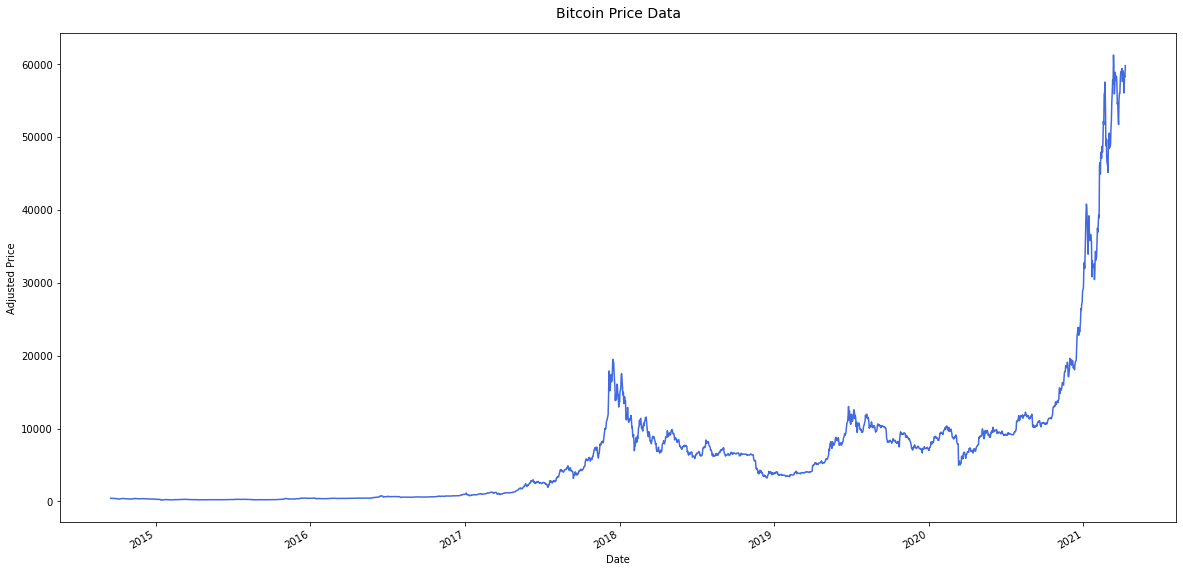

In [13]:
# plot the bitcoin adjusted price over time 
plt.figure(figsize = (20, 10))
bitcoin_p["Close"].plot(color = 'royalblue')
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.title("Bitcoin Price Data", fontsize=14, pad='15.0')
plt.show()

In [14]:
# Dogecoin Price 

# define the ticker symbol
tickerSymbol = 'DOGE-USD'

# get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# get the historical prices for this ticker
dogecoin_p = tickerData.history(period='1d', start='2010-06-04', end='2021-04-11')

# get daily returns
dogecoin_p["daily_returns"] = (dogecoin_p["Close"] / dogecoin_p["Close"].shift(1)) - 1

# see your data
dogecoin_p.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns
Date,,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,1463600,0,0,NaN
2014-09-18,0.000268,0.000325,0.000267,0.000298,2215910,0,0,0.111940
2014-09-19,0.000298,0.000307,0.000275,0.000277,883563,0,0,-0.070470
2014-09-20,0.000276,0.000310,0.000267,0.000292,993004,0,0,0.054152
2014-09-21,0.000293,0.000299,0.000284,0.000288,539140,0,0,-0.013699


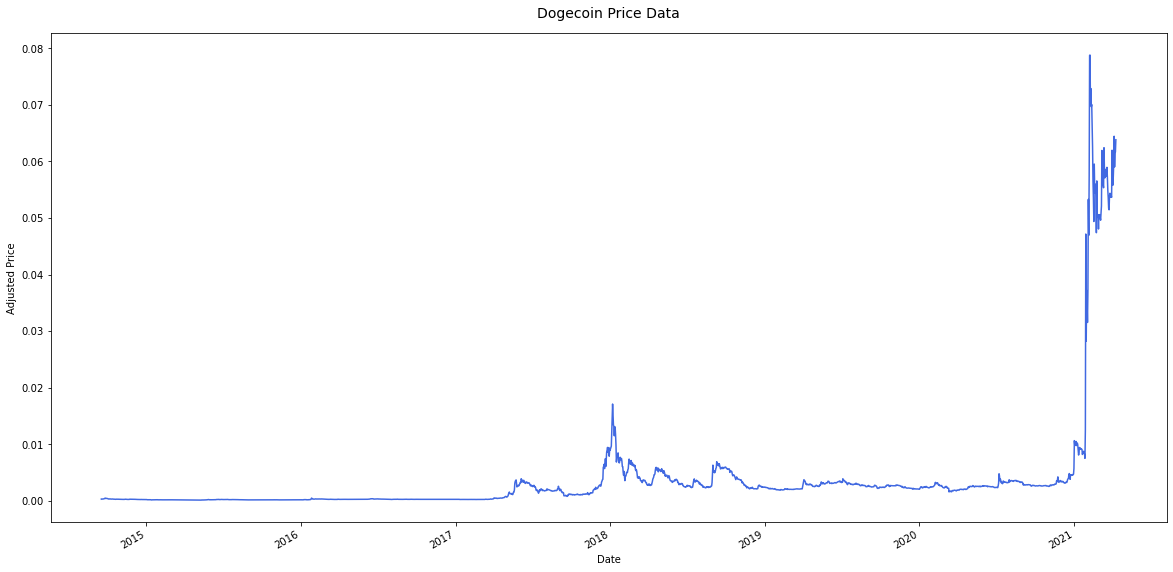

In [15]:
# plot the dogecoin adjusted price over time 
plt.figure(figsize = (20, 10))
dogecoin_p["Close"].plot(color = 'royalblue')
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.title("Dogecoin Price Data", fontsize=14, pad='15.0')
plt.show()

# NLP - Sentiment Analysis: <a id="Section2"></a>

For the sentiment prediction I tried various packages including BERTweet as well as Naive Bayes and Logistics Regression. All seemed eather to time consuming because I had to manually train the algorithm or in the case of BERTweet the documentation was partly confusing and also time consuming because I had to preprocess and manipulate the data in order for the algorithm to interpret it. The Vader approach does not require these preprocessing activities (including tokenization, stemming etc.) and just tries to utilize every bit of data. More on that matter in the section below. 

## Vader Approach #1

The majority of sentiment analysis approaches take one of two forms: polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account. For example, the words ‘good’ and ‘excellent’ would be treated the same in a polarity-based approach, whereas ‘excellent’ would be treated as more positive than ‘good’ in a valence-based approach.

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed on social media and as we can see in the name it is a valence-based classifier. 

This approach takes an already trained model and applies this model to the tweets. This has a couple of advantages: First I don't have to gather millions of labeled data entries with which I would train my model. Second this sentiment anlysis tool was build (and is still being updated) by a team of professionals who created a very sensable heuristic framework which would be immensely time consuming to do it by myself and vastly less efficient. They considered things like emojis, punctuation, capitalization etc. and fine tuned this tool to an extent that I wouldn't be capable of. From a result and efficiency driven perspective not taking VADER (or any other reasonably trained model) would be a bad business decision and would result into significantly worse results.

From a technical perspective VADER relies on a dictionary that maps words and other numerous lexical features common to sentiment expression in microblogs. These features include a full list of western-style emoticons for example ":-)" or ":P" as well as sentiment-related acronyms e.g "LOL" or "ROFL". In addition to that it encompasses commonly used sland with sentiment value. (e.g: "Nah" or "meh"). These features are particularly important for this use case because social media text often times has exactly these attributes which can contribute immensely to the sentiment of the tweet if classified correctly. 

Now maybe the question arises how VADER comes up with it's results also called the VADER score. Essentially what this algorithm is doing is to use 5 distinctive heuristics and create a valence score for each word of the given text. These scores are then being summed up and normalized between -1 (extremly negative) and +1 (extremly positive). These heuristics include: Punctuation, Capitalization, Degree modifiers (increases the existing sentiment, so "that's NICE" conveys a stronger sentiment than "that's nice"), Polarity shift (mostly caused by conjunctions), Catching Polarity Negation (the VADER team claims they can "catch nearly 90% of cases where negation flips the polarity of the text. For example a negated sentence would be "That isn't really nice."") 
 

***


source9: Hutto, C. J. (o. D.). cjhutto/vaderSentiment. GitHub. Abgerufen am 13. Juli 2021, von https://github.com/cjhutto/vaderSentiment

source10: Hutto, C. J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [16]:
# import vader 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [17]:
# prepare the data
sentences = np.array(tweets["tweet"])

In [18]:
# get the vader scores 
tweets['vader_scores'] = tweets['tweet'].apply(lambda sentences: analyzer.polarity_scores(sentences))
tweets['compound']  = tweets['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# convert scores into categorical variable (small manipulation)
tweets['comp_score'] = tweets['compound'].apply(lambda c: 'pos' if c>0.05 else ('neu' if c>-0.05 else 'neg'))

# convert scores into categorical variable (small manipulation)
tweets['comp_score_int'] = tweets['compound'].apply(lambda c: 1 if c>0.05 else (0 if c>-0.05 else -1))
        
tweets.head()

,id,created_at,date,time,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,link,reply_to,created_at_EST,date_EST,vader_scores,compound,comp_score,comp_score_int
0,1381273474400800773,2021-04-11 18:50:33,2021-04-11,18:50:33,elonmusk,@vincent13031925 For now. Costs are decreasing...,[],640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,"[{'screen_name': 'vincent13031925', 'name': 'V...",2021-04-11 18:50:33-05:00,2021-04-11,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0
1,1381273076709478403,2021-04-11 18:48:58,2021-04-11,18:48:58,elonmusk,Love this beautiful shot,[],2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,[],2021-04-11 18:48:58-05:00,2021-04-11,"{'neg': 0.0, 'neu': 0.198, 'pos': 0.802, 'comp...",0.8442,pos,1
2,1381258144916008964,2021-04-11 17:49:38,2021-04-11,17:49:38,elonmusk,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],115,48,1380,[],https://twitter.com/elonmusk/status/1381258144...,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",2021-04-11 17:49:38-05:00,2021-04-11,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.5106,pos,1
3,1381221447322935303,2021-04-11 15:23:49,2021-04-11,15:23:49,elonmusk,The art In Cyberpunk is incredible,[],8437,10329,228144,[],https://twitter.com/elonmusk/status/1381221447...,[],2021-04-11 15:23:49-05:00,2021-04-11,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0
4,1381129584435818496,2021-04-11 09:18:47,2021-04-11,09:18:47,elonmusk,@itsALLrisky 🤣🤣,[],446,542,7489,[],https://twitter.com/elonmusk/status/1381129584...,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",2021-04-11 09:18:47-05:00,2021-04-11,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0


# Correlation Analysis and Visualization <a id="Section3"></a>

In the following section we will be looking at the time period from 2020-01-01 until 2021-04-01. Choosing the right time period is a very difficult task to do for several reasons. First there has to be a reasonable justification for leaving out data. In our case we leave out data because as we have seen in the data insepection part Mr. Musk's followership and hence influence was not always as strong as it is in 2021. The average reply and retweet per tweet in 2010 was less than 1/6 of what it was in 2021. Consequently with fewer followers and fewer absolute engagement there is reason to believe that his influence was not as strong in 2010 as it is now. Another aspect is the fact that we need a certain time period in order generate enough data to do a sensible correlation analysis. Starting at 2020-01-01 and ending at 2021-04-01 takes both matters into account since Mr.Musks influence is significant enough and we also get enough data. 

There are multiple ways in which I can look at changes in the tesla stock. We have closing price which is the last price at which a security is being traded during the regular trading day and we have daily returns which indicates the change of the security price on the given day. Both qualify for a correlation analysis while the later is more suitable for this use case since daily returns offer the possibility to look at prices in a relative manner which is essentially what we need to do in order to compare what the daily sentiment of Mr. Musk tweets are and what the daily change in price is. 

For the comparison I first have to filter all the tweets for certain buzzwords that are linked to Tesla. This task is particularly senstive to our correlation output because here I'm deliberately removing data and thus potential insights from the dataset. 

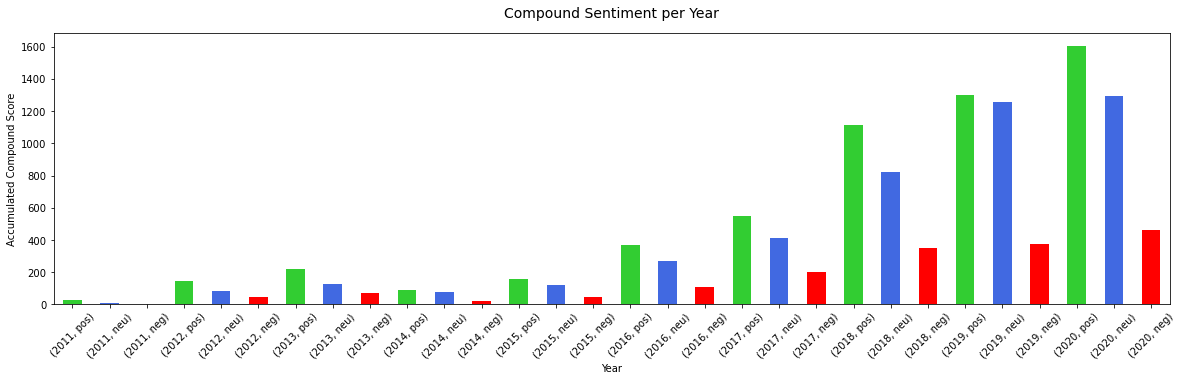

In [19]:
# Inspect new features
tweets_cs = tweets.comp_score.groupby(tweets.date_EST.dt.year).value_counts().iloc[1:]

# create colours for the plot 
my_colors = list(islice(cycle(['limegreen', 'royalblue', 'red']), None, len(tweets_cs)))

# plot feature (exluding 2021 because of absolute numbers - would be misleading since 2021 is not over yet)
plt.figure(figsize = (20, 5))
tweets_cs[:-3,].plot.bar(stacked=True, color=my_colors)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Accumulated Compound Score")
plt.title("Compound Sentiment per Year", fontsize=14, pad='15.0')
plt.show()

> We can see that Mr.Musks tweets are predominatly positive!

In [20]:
# filter for tweets about tesla
# other buzzwords that were being tested: battery|Battery|self driving|self-driving|Self-driving|autopilot|Autopilot|model|Model|AI|ai|auto|car
buzzwords_tesla = "TSL|tsl|Tesla|TESLA|tesla"
tweets_tesla = tweets[tweets['tweet'].str.contains(buzzwords_tesla)]

# filter for tweets about bitcoin
buzzwords_doge = "Doge|doge|DOGE|dogecoin|Dogecoin|DOGECOIN"
tweets_doge = tweets[tweets['tweet'].str.contains(buzzwords_tesla)]

# filter for tweets about dogecoin
buzzwords_bitcoin = "bitcoin|BITCOIN|Bitcoin|BTC|btc|Btc"
tweets_bitcoin = tweets[tweets['tweet'].str.contains(buzzwords_tesla)]

After filtering the dataset for the respective asset we are going to have a look whether the composition of positive, negative and neutral tweets is different from the previous dataset. Generally speaking this can be important to understand whether we have skewed data and if so in which direction the datset is skewed. 

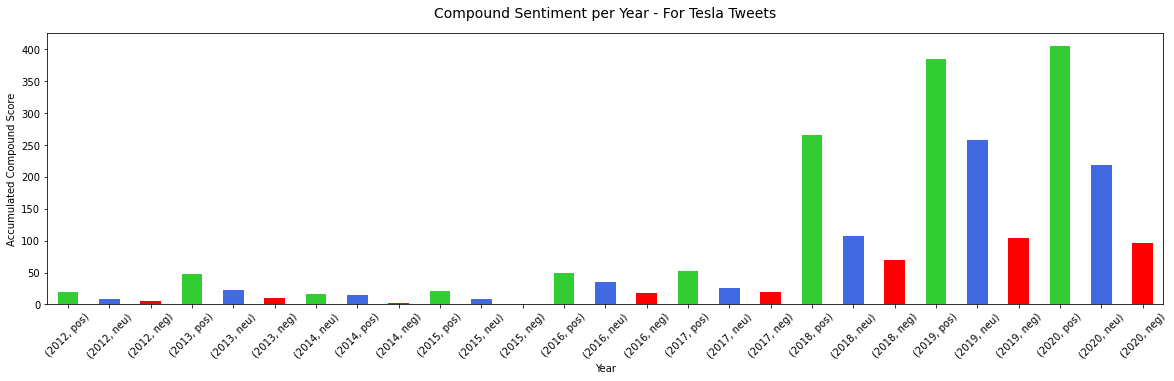

In [21]:
# Inspect new features
tweets_tesla_cs = tweets_tesla.comp_score.groupby(tweets_tesla.date_EST.dt.year).value_counts().iloc[1:]

# create colours for the plot 
my_colors = list(islice(cycle(['limegreen', 'royalblue', 'red']), None, len(tweets_tesla_cs)))

# plot feature (exluding 2021 because of absolute numbers - would be misleading since 2021 is not over yet)
plt.figure(figsize = (20, 5))
tweets_tesla_cs[:-3,].plot.bar(stacked=True, color=my_colors)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Accumulated Compound Score")
plt.title("Compound Sentiment per Year - For Tesla Tweets", fontsize=14, pad='15.0')
plt.show()

> We can see that Mr.Musks tweets became through the tesla filter __relatively more positive__! 

## Visualization - Tesla Closing Price with Sentiment

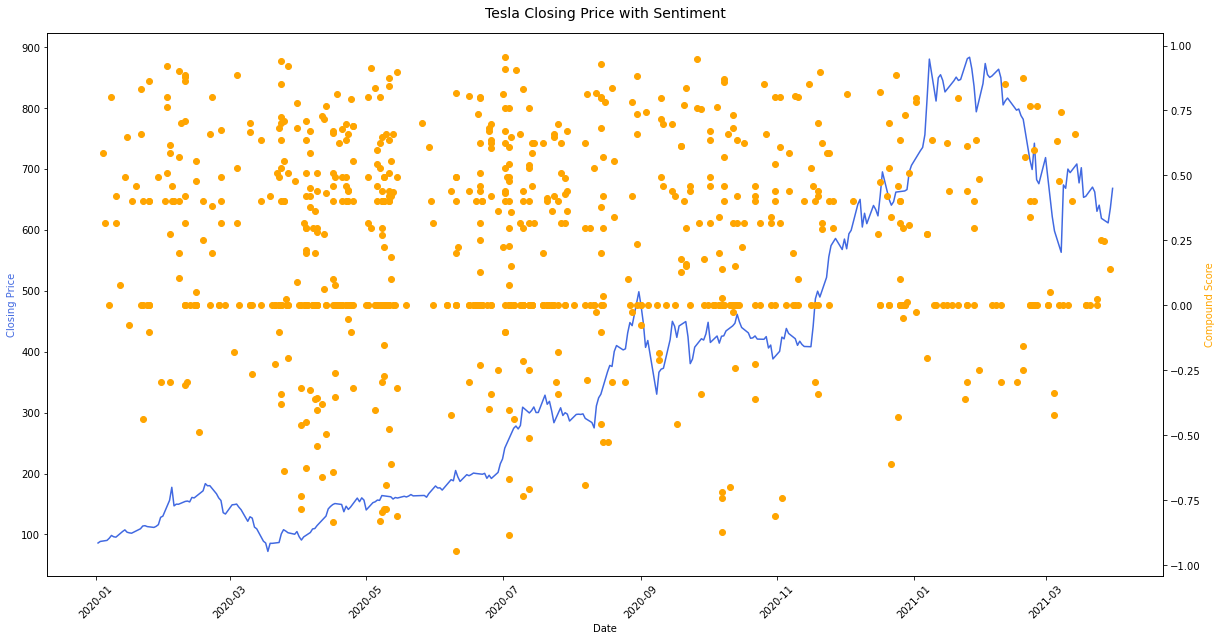

In [22]:
# define start and end date 
start = '2020-01-01'
end = '2021-04-01'

# filter for time period
tesla_p_t = tesla_p[(tesla_p.index > start) & (tesla_p.index < end)]
tweets_tesla_t = tweets_tesla[(tweets_tesla.date > start)& (tweets_tesla.date < end)]

# plot tesla closing price and the vader sentiment
fig,ax = plt.subplots(figsize = (20, 10))
ax.plot(tesla_p_t.index, 
        tesla_p_t.Close,
        color = 'royalblue')
plt.xticks(rotation=45)
ax2 = ax.twinx()
ax2.scatter(pd.to_datetime(tweets_tesla_t.date_EST), 
            tweets_tesla_t.compound,
            color = "orange")
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price', color = 'royalblue')
ax2.set_ylabel('Compound Score', color = 'orange')
plt.title("Tesla Closing Price with Sentiment", fontsize=14, pad='15.0')
plt.show()

## Visualization - Tesla Daily Return with Sentiment

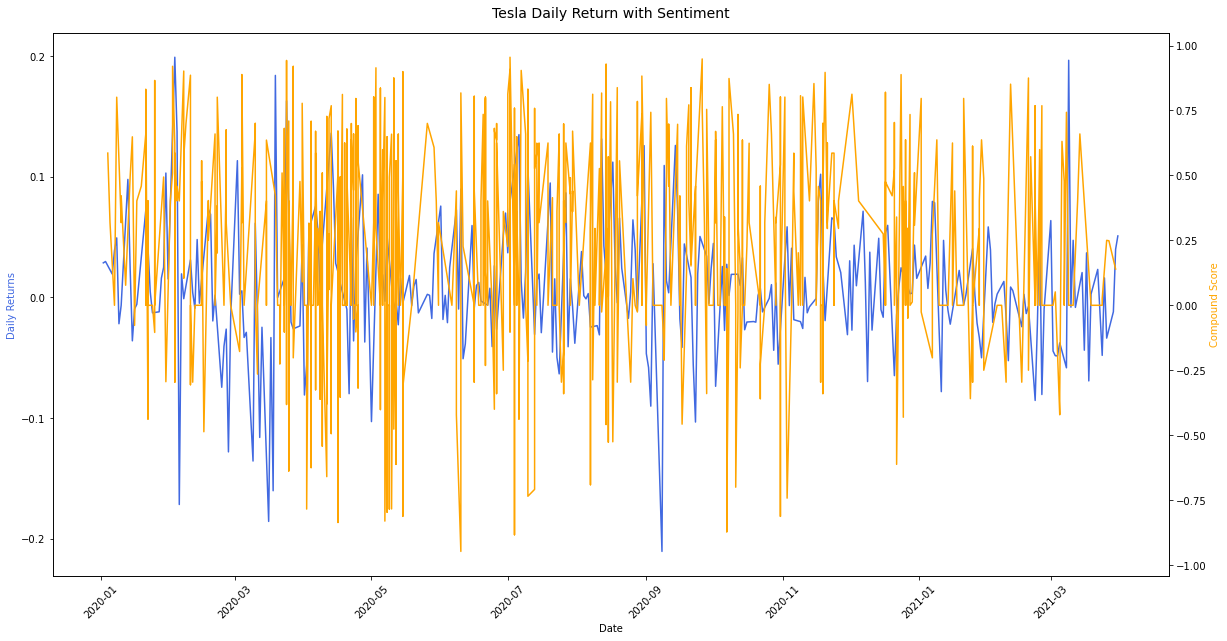

In [23]:
# plot tesla stock and elon tweet sentiment 
fig,ax = plt.subplots(figsize = (20, 10))
ax.plot(tesla_p_t.index, 
        tesla_p_t.daily_returns, 
        color = 'royalblue')
plt.xticks(rotation=45)
ax2 = ax.twinx()
ax2.plot(pd.to_datetime(tweets_tesla_t.date_EST), 
            tweets_tesla_t.compound,
            color = "orange")
ax.set_xlabel('Date')   
ax.set_ylabel('Daily Returns', color = 'royalblue')
ax2.set_ylabel('Compound Score', color = 'orange')
plt.title("Tesla Daily Return with Sentiment", fontsize=14, pad='15.0')
plt.show()

## Correlation analysis & Visualization of Daily Returns of Tesla and Musk's Twitter Sentiment

The compound score is being grouped by date in order to get the sentiment for each day. This can result in compound scores which are bigger than 1 or smaller than -1 because the compound scores for each day are being aggregated. After that the grouped compound score is being plotted with the daily returns of the Telsa stock price. This approach has the advantage of just looking at those dates where Mr.Musk actually tweeted.  

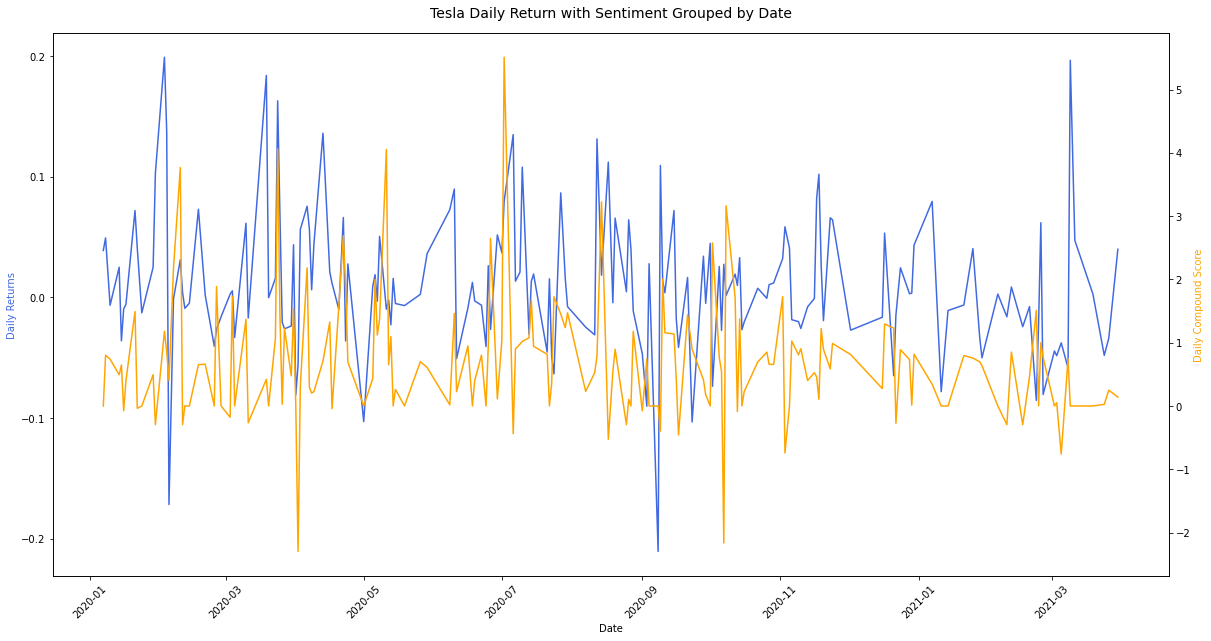

In [24]:
# group results of elon_tweets_ft by date 
tweets_tesla_cor = tweets_tesla_t.groupby(pd.to_datetime(tweets_tesla['date_EST']).dt.date).sum()

# create new column from index because of ambiguity 
tweets_tesla_cor['Date'] = pd.to_datetime(tweets_tesla_cor.index)

# merge the stock data and the sentiment analysis data set 
merged_df = tweets_tesla_cor.merge(tesla_p, 
                                   how = "inner",
                                   on = 'Date')

# applying time zone to the merged dataset 
merged_df_t = merged_df[(merged_df.Date > start) & (merged_df.Date < end)]

# plot tesla stock and elon tweet sentiment 
fig,ax = plt.subplots(figsize = (20, 10))
ax.plot(pd.to_datetime(merged_df_t.Date), 
        merged_df_t.daily_returns, 
        color = 'royalblue')
plt.xticks(rotation=45)
ax2 = ax.twinx()
ax2.plot(pd.to_datetime(merged_df_t.Date), 
            merged_df_t.compound,
            color = "orange")
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns', color = 'royalblue')
ax2.set_ylabel('Daily Compound Score', color = 'orange')
plt.title("Tesla Daily Return with Sentiment Grouped by Date", fontsize=14, pad='15.0')
plt.show()

In [25]:
# filter the respective columns 
corr, p_value = scipy.stats.pearsonr(merged_df_t["compound"], merged_df_t["daily_returns"])

print('Correlation Coefficient:',corr.round(3))
print('P-Value:',p_value.round(3))

Correlation Coefficient: 0.131
P-Value: 0.078


>Results: No significant linear correlation can be detected!

## Engagement Scores and Sentiment 
One factor that might be important to point out is the fact that certain tweets get more attention than others. Attention can be an important ingredient in determining which tweet was actually seen by a lot of potential traders. Consequently I came to the conclusion that I might have to update the VADER score with an additional engagement score composed of the likes, retweets and replies that the corresponding tweet has. In order to calculate a one dimensional engagement-compound metric I had to normalize the three popularity factors likes, retweets and replies for a given tweet. Then I added these normalized scores up and multiply these with the preexisting compound score which results in the compound-engagement score. This new metric shows us in one value the sentiment as well as the Twitter engagement and reach for the respective tweet. 

In [26]:
# creating a sensible engagement score through normalization
x = merged_df_t[['replies_count','retweets_count','likes_count']].values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
engagement_score = df[0]+df[1]+df[2]

# append engagement_score & compound_engagement_score
merged_df_t['engagement_score'] = engagement_score
merged_df_t['compound_engagement_score'] = merged_df_t['engagement_score']*merged_df_t['compound']
merged_df_t.head()

,id,replies_count,retweets_count,likes_count,compound,comp_score_int,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,engagement_score,compound_engagement_score
0,1.214484e+18,6687.0,33303.0,286336.0,0.0000,0.0,2020-01-07,92.279999,94.325996,90.671997,93.811996,89410500,0,0.0,0.038801,0.667375,0.000000
1,1.214956e+18,1514.0,2749.0,88447.0,0.8011,1.0,2020-01-08,94.739998,99.697998,93.646004,98.428001,155721500,0,0.0,0.049205,0.136189,0.109101
2,2.431051e+18,147.0,150.0,6699.0,0.7397,2.0,2020-01-10,96.358002,96.987999,94.739998,95.629997,64797500,0,0.0,-0.006627,0.008683,0.006423
3,1.216903e+18,168.0,147.0,7464.0,0.4926,1.0,2020-01-14,108.851997,109.482002,104.980003,107.584000,144981000,0,0.0,0.024883,0.009874,0.004864
4,1.217494e+18,335.0,242.0,12471.0,0.6486,1.0,2020-01-15,105.952003,107.568001,103.358002,103.699997,86844000,0,0.0,-0.036102,0.019216,0.012464


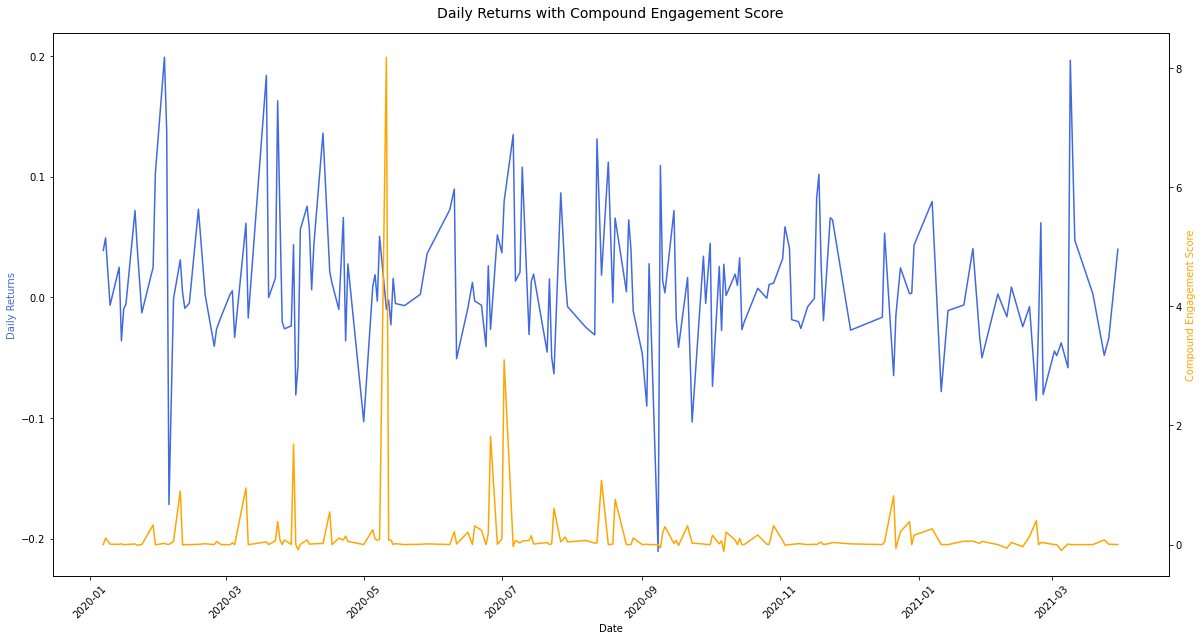

In [27]:
# plot engagement and daily returns over time 
fig,ax = plt.subplots(figsize = (20, 10))
ax.plot(pd.to_datetime(merged_df_t.Date), 
        merged_df_t.daily_returns, 
        color = 'royalblue')
plt.xticks(rotation=45)
ax2 = ax.twinx()
ax2.plot(pd.to_datetime(merged_df_t.Date), 
            merged_df_t.compound_engagement_score,
            color = "orange")
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns', color = 'royalblue')
ax2.set_ylabel('Compound Engagement Score', color = 'orange')
plt.title("Daily Returns with Compound Engagement Score", fontsize=14, pad='15.0')
plt.show()

In [28]:
# correlation analysis 
corr, p_value = scipy.stats.pearsonr(merged_df_t["compound_engagement_score"], merged_df_t["daily_returns"])

print('Correlation Coefficient:',corr.round(3))
print('P-Value:',p_value.round(3))

Correlation Coefficient: 0.014
P-Value: 0.849


>Results: No significant linear correlation can be detected!

## Correlation Analysis of the General Polarity 
Since VADER also shows the calculated intensity of the sentiment I was curios whether at least the direction of sentiment so either neutral, positive or negative correlates with the daily returns. 

In [29]:
# correlation analysis 
corr, p_value = scipy.stats.pearsonr(merged_df_t["comp_score_int"], merged_df_t["daily_returns"])

print('Correlation Coefficient:',corr.round(3))
print('P-Value:',p_value.round(3))

Correlation Coefficient: 0.11
P-Value: 0.138


>Results: No significant linear correlation can be detected!

# Bonus - Dogecoin and Bitcoin Analysis <a id="Section4"></a>

## Bitcoin: Correlation analysis of Daily Return and Musk's Twitter Sentiment

In [30]:
# create new column from index because of ambiguity 
tweets_bitcoin['Date'] = pd.to_datetime(tweets_bitcoin['date'])

# apply time period
tweets_bitcoin_t = tweets_bitcoin[(tweets_bitcoin.created_at > start) & (tweets_bitcoin.created_at < end)]

# merge the stock data and the sentiment analysis data set 
merged_df_bit = tweets_bitcoin_t.merge(bitcoin_p, 
                                   how = "inner",
                                   on = 'Date')

# correlation analysis 
corr, p_value = scipy.stats.pearsonr(merged_df_bit["compound"], merged_df_bit["daily_returns"])

print('Correlation Coefficient:',corr.round(3))
print('P-Value:',p_value.round(3))

Correlation Coefficient: 0.016
P-Value: 0.647


<ipython-input-30-29c2d2761ae7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_bitcoin['Date'] = pd.to_datetime(tweets_bitcoin['date'])


> Results: No significant linear correlation can be detected!

## Dogecoin: Correlation analysis of Daily Return and Musk's Twitter Sentiment

In [31]:
# create new column from index because of ambiguity 
tweets_doge['Date'] = pd.to_datetime(tweets_doge['date'])

# 
tweets_doge_t = tweets_bitcoin[(tweets_doge.created_at > start) & (tweets_doge.created_at < end)]

# merge the stock data and the sentiment analysis data set 
merged_df_doge = tweets_doge_t.merge(dogecoin_p, 
                                   how = "inner",
                                   on = 'Date')

# correlation analysis 
corr, p_value = scipy.stats.pearsonr(merged_df_doge["compound"], merged_df_doge["daily_returns"])

print('Correlation Coefficient:',corr.round(3))
print('P-Value:',p_value.round(3))

Correlation Coefficient: 0.078
P-Value: 0.03


<ipython-input-31-508acbdfc924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_doge['Date'] = pd.to_datetime(tweets_doge['date'])


> Results: No significant linear correlation can be detected!

# Conclusion <a id="Section5"></a>

During my analysis I tried different time periods in order to find some sort of pattern. Sometimes during certain periods the correlation was as high as ~ 0.9 but this pattern did not withstand longer periods which leads to the conclusion that these correlations are a) random or b) a result of one particular tweet but in both cases can not be replicated and hence can not be seen as reliable indicator for future tweets. 

In addition to that finding the relevant tweets in which Mr.Musk tweeted about Tesla (or Dogecoin, Bitcoin) was challenging. Initially I tried to inlcude as many Tesla related words as possible so not only "telsa" but also topics such as "battery" or "autopilot". The more words I included the higher the correlation was but when I looked closer I saw that I catched more than just Tesla tweets but rather also tweets about his general opinion on these topics. And because the dataset is skewed since Mr.Musk tweets are rather positive than negative the more tweets overall I include the higher the correlation is with the increasing Tesla stock price. Consequently I find the best solution to stick with clear Tesla relatated words which does not catch everything but with these tweets I can be sure that he talked about Tesla and that the correlation analysis is valid. 

Finally I can conclude that I can not discard my H0 hypothesis "There is no singificant linear correlation between the sentiment (describe quantitatively through the VADER score) of Elon Musks tweets about Tesla and the Tesla stock price" and hence have to derive from that that (given that the methods and precedures are correctly deployed): 
> there is __no clear significant correlation__ between the sentiment of Mr.Musks tweets regarding his company Tesla and the stock price of Tesla. (The same result applies for Dogecoin and Bitcoin) 
***

Potential further investigations: One aspect which I assumed in this analysis is that if Mr.Musk tweets for instance positively about Tesla the potential traders are to a certain extent represented by his twitter followership. Furthermore those traders act within the day in which the tweet was released. Both assumptions can be challenged with further investigations about e.g timeframing so giving the traders for example 10 minutes time to react and then look at the change in stock price. One could also do a clusteranalysis of his followers in order to understand to which extent his followers are engaged in financial securities in general. Another approach can be to analyse which of his tweets had an impact on the stock price and whether there can be defined a certain pattern in those tweets. 